In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

## Housing Dataset 

In this Assignment we will work with a dataset of patients. 
We have access to 303 patients' data. The features are listed below. 

In [ ]:
df = pd.read_csv('housing.csv')

Creating dummy columns for ocean proximity

In [ ]:
df = pd.get_dummies(df, columns=['ocean_proximity'])

#renaming the columns for ocean proxmity

## Fixing Dataset to show non-nulls

1. Dropping all the non-null variables
2. Reducing the length of the filter to 2000
3. Multiplying income by 10k to match actual results

In [ ]:
#randomizing the data
reduced_df = df.sample(n=3000)

# 1. Dropping all the non-null variables
base_df = reduced_df.dropna()

# 2. Multiplying income by 10k to match actual results
base_df['median_income'] *= 10000

# 3. Reducing the length of the filter to 2000
testing_df = base_df.tail(200)
filtered_df = base_df.head(2000)

#checking to make sure that the dataset is correct
filtered_df.isnull().values.sum()

C:\Users\logan\AppData\Local\Temp\ipykernel_16500\3404191949.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_df['median_income'] *= 10000


0

Creating Variables

In [ ]:
X = filtered_df[['housing_median_age', 'total_rooms','households', 'median_income']]
y = filtered_df['median_house_value']
X_test = testing_df[['housing_median_age', 'total_rooms','households', 'median_income']]
y_test = testing_df['median_house_value']

Creating code for MAE

In [ ]:
def get_mae(s_y: np.ndarray, s_y_hat: np.ndarray) -> float:
    """Compute the mean absolute error between the true values s_y
    and the predicted values s_y_hat."""
    n = len(s_y)
    mae = np.sum(np.abs(s_y - s_y_hat)) / n
    return mae

SVM

In [ ]:
from sklearn.metrics import r2_score

model = svm.LinearSVC(C=.01, max_iter=100, fit_intercept=True)
model.fit(X, y)

print(dir(model))

print(model.coef_)
print(model.fit_intercept)

y_pred = model.predict(X_test)

print("MAE:", get_mae(y_test, y_pred))

print("r2:", r2_score(y_test, y_pred))

['C', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_feature_names', '_check_n_features', '_estimator_type', '_get_param_names', '_get_tags', '_more_tags', '_parameter_constraints', '_predict_proba_lr', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', '_validate_params', 'class_weight', 'classes_', 'coef_', 'decision_function', 'densify', 'dual', 'feature_names_in_', 'fit', 'fit_intercept', 'get_params', 'intercept_', 'intercept_scaling', 'loss', 'max_iter', 'multi_class', 'n_features_in_', 'n_iter_', 'penalty', 'predict', 'random_state', 'score', 'set_params', 'sparsify', 'tol', 'verbose']
[[-6.73791951e-06  4.

c:\Users\logan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Linear REgression

In [ ]:
model = LinearRegression().fit(X, y)
results = '''Equation: 1738 * housing_median_age + -17.95 * total_rooms + 147.26 * households + 4.77  * median income - 48055.93740135277

Coefficient (housing_median_age) 1738.9596087933064
Coefficient (total_rooms) -20.718910761725837
Coefficient (households) 147.25920947752437
Coefficient (median_income) 4.776460110792826
Intercept: {}'''.format(model.intercept_)
print(results)

Equation: 1738 * housing_median_age + -17.95 * total_rooms + 147.26 * households + 4.77  * median income - 48055.93740135277

Coefficient (housing_median_age) 1738.9596087933064
Coefficient (total_rooms) -20.718910761725837
Coefficient (households) 147.25920947752437
Coefficient (median_income) 4.776460110792826
Intercept: -48055.93740135277


Code for obtaining coefficients

In [ ]:
for i, co in enumerate(model.coef_):
    print('Coefficient (', X.columns[i], ') ', co, sep='')

Coefficient (housing_median_age) 1738.9596087933064
Coefficient (total_rooms) -20.718910761725837
Coefficient (households) 147.25920947752437
Coefficient (median_income) 4.776460110792826


Testing Data against predicting data

In [ ]:
y_pred = X_test.dot(model.coef_)
get_mae(y_test, y_pred.squeeze())

72445.11535713827

Calculating correlation coefficients

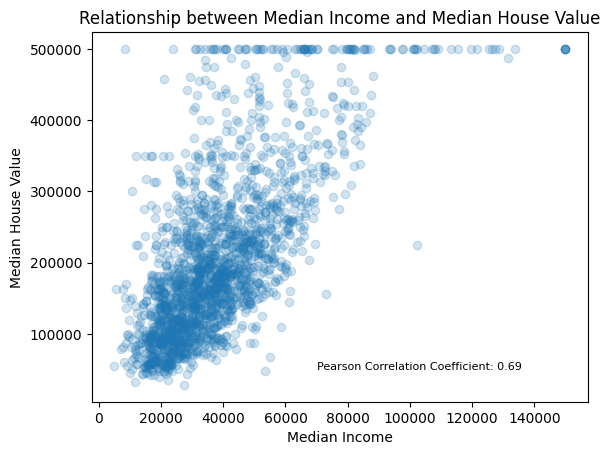

In [ ]:
# Calculate the Pearson correlation coefficient between median_income and median_house_value
corr_coeff = filtered_df['median_income'].corr(filtered_df['median_house_value'], method='pearson')

# Plot a scatter plot to visualize the relationship between median_income and median_house_value
plt.scatter(filtered_df['median_income'], filtered_df['median_house_value'], alpha=0.2)
plt.title('Relationship between Median Income and Median House Value', fontsize=12)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.text(70000, 50000, f'Pearson Correlation Coefficient: {corr_coeff:.2f}', fontsize=8)
plt.show()

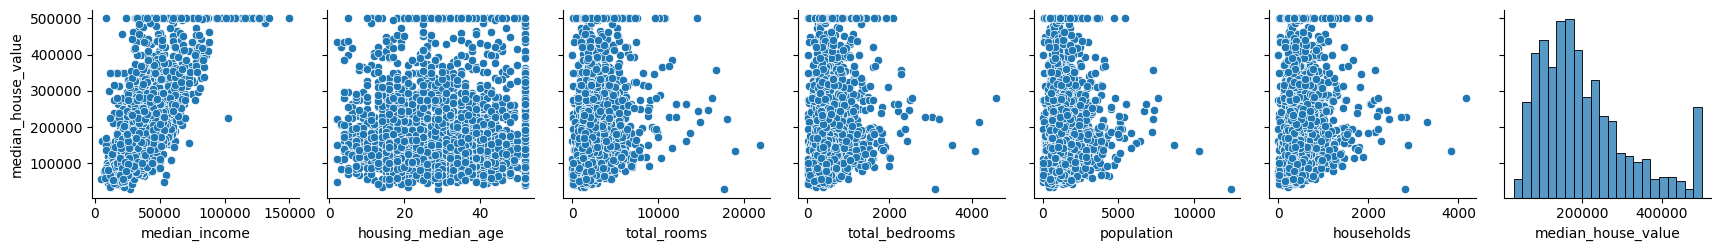

Pearson correlation coefficients:
median_income         0.687633
housing_median_age    0.083417
total_rooms           0.168086
total_bedrooms        0.078348
population           -0.011734
households            0.094241
Name: median_house_value, dtype: float64


In [ ]:
# Calculate the Pearson correlation coefficients between median_house_value and other variables
corr_coeffs = filtered_df.corr()['median_house_value'][['median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households']]

# Create a pairplot to visualize the pairwise relationships between the variables
sns.pairplot(filtered_df[['median_income','housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_house_value']], y_vars=['median_house_value'])
plt.show()

# Display the correlation coefficients
print('Pearson correlation coefficients:')
print(corr_coeffs)

In [ ]:
# Calculate the Pearson correlation coefficient between median_income and median_house_value
corr_coeff = filtered_df['median_income'].corr(filtered_df['median_house_value'], method='pearson')

# Fit a linear regression model to the data
model = LinearRegression()
X = filtered_df[['median_income']]
y = filtered_df['median_house_value']
model.fit(X, y)

# Calculate the R-squared value for the model
r_squared = model.score(X, y)

# Plot a scatter plot with the regression line and display the R-squared value
plt.scatter(X, y, alpha=0.2)
plt.plot(X, model.predict(X), color='red')
plt.title('Relationship between Median Income and Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.text(1, 600000, f'Pearson Correlation Coefficient: {corr_coeff:.2f}\nR-squared: {r_squared:.2f}', fontsize=10)
plt.show()

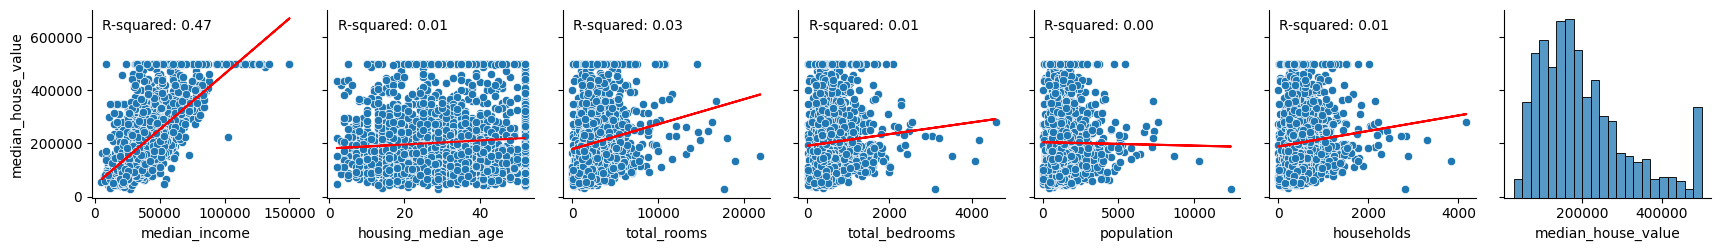

Pearson correlation coefficients:
median_income         0.687633
housing_median_age    0.083417
total_rooms           0.168086
total_bedrooms        0.078348
population           -0.011734
households            0.094241
Name: median_house_value, dtype: float64


In [ ]:
import seaborn as sns

# Calculate the Pearson correlation coefficients between median_house_value and other variables
corr_coeffs = filtered_df.corr()['median_house_value'][['median_income','housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households']]

# Fit linear regression models to the data and calculate the R-squared values
models = {}
r_squared_values = {}
for col in corr_coeffs.index:
    X = filtered_df[[col]]
    y = filtered_df['median_house_value']
    model = LinearRegression()
    model.fit(X, y)
    models[col] = model
    r_squared_values[col] = model.score(X, y)

# Create a pairplot to visualize the pairwise relationships between median_house_value and other variables
g = sns.pairplot(filtered_df[['median_income','housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_house_value']], y_vars=['median_house_value'])

# Plot the regression lines and display the R-squared values
for i, col in enumerate(corr_coeffs.index):
    ax = g.axes[0, i]
    ax.plot(filtered_df[col], models[col].predict(filtered_df[[col]]), color='red')
    ax.text(0.05, 0.95, f'R-squared: {r_squared_values[col]:.2f}', transform=ax.transAxes, ha='left', va='top')
    
plt.show()

# Display the correlation coefficients
print('Pearson correlation coefficients:')
print(corr_coeffs)


## Updates/Improvements

#Ignoring bad variables and Implementing Ocean Proximity

In [ ]:
filtered_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [ ]:
X_age = filtered_df[['total_rooms','households', 'median_income', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']]
y_age = filtered_df['median_house_value']
X_test_age = testing_df[['total_rooms','households', 'median_income', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']]
y_test_age = testing_df['median_house_value']

new_model = LinearRegression().fit(X_age, y_age)

In [ ]:
for i, co in enumerate(new_model.coef_):
    print('Coefficient (', X_age.columns[i], ') ', co, sep='')

Coefficient (total_rooms) -10.152341286440562
Coefficient (households) 75.82729242779818
Coefficient (median_income) 3.9682057336872134
Coefficient (ocean_proximity_<1H OCEAN) 7220.817169622766
Coefficient (ocean_proximity_INLAND) -62647.388478054665
Coefficient (ocean_proximity_ISLAND) 0.0
Coefficient (ocean_proximity_NEAR BAY) 26298.994998182705
Coefficient (ocean_proximity_NEAR OCEAN) 29127.57631024924


In [ ]:
results = '''Equation: total_rooms * -10.152341286440562 + households * 75.82729242779818 + median_income * 3.9682057336872134
+ ocean_proximity_<1H OCEAN * 7220.817169622766 + ocean_proximity_INLAND * -62647.388478054665
+ ocean_proximity_ISLAND * 0.0 + ocean_proximity_NEAR BAY * 26298.994998182705 + ocean_proximity_NEAR OCEAN * 29127.57631024924

Coefficient (total_rooms) -10.152341286440562
Coefficient (households) 75.82729242779818
Coefficient (median_income) 3.9682057336872134
Coefficient (ocean_proximity_<1H OCEAN) 7220.817169622766
Coefficient (ocean_proximity_INLAND) -62647.388478054665
Coefficient (ocean_proximity_ISLAND) 0.0
Coefficient (ocean_proximity_NEAR BAY) 26298.994998182705
Coefficient (ocean_proximity_NEAR OCEAN) 29127.57631024924
Intercept: {}'''.format(no_age.intercept_)
print(results)

Equation: total_rooms * -10.152341286440562 + households * 75.82729242779818 + median_income * 3.9682057336872134
+ ocean_proximity_<1H OCEAN * 7220.817169622766 + ocean_proximity_INLAND * -62647.388478054665
+ ocean_proximity_ISLAND * 0.0 + ocean_proximity_NEAR BAY * 26298.994998182705 + ocean_proximity_NEAR OCEAN * 29127.57631024924

Coefficient (total_rooms) -10.152341286440562
Coefficient (households) 75.82729242779818
Coefficient (median_income) 3.9682057336872134
Coefficient (ocean_proximity_<1H OCEAN) 7220.817169622766
Coefficient (ocean_proximity_INLAND) -62647.388478054665
Coefficient (ocean_proximity_ISLAND) 0.0
Coefficient (ocean_proximity_NEAR BAY) 26298.994998182705
Coefficient (ocean_proximity_NEAR OCEAN) 29127.57631024924
Intercept: 51425.22859114871


In [ ]:
y_pred_age = X_test_age.dot(new_model.coef_)
get_mae(y_test_age, y_pred_age.squeeze())

58535.36927084676

In [ ]:
model = svm.LinearSVC(C=.01, max_iter=100, fit_intercept=False)
model.fit(X_age, y_age)

# print(dir(model))

print(model.coef_)
print(model.fit_intercept)

y_pred = model.predict(X_test_age)

print("MAE:", get_mae(y_test_age, y_pred))

print("r2:", r2_score(y_test_age, y_pred))

[[ 4.81385888e-04  1.71973659e-06 -2.78523042e-04 ...  0.00000000e+00
   0.00000000e+00  5.63786652e-08]
 [ 1.73518417e-04 -2.67336106e-04 -1.25071426e-04 ...  0.00000000e+00
  -4.51678348e-07  0.00000000e+00]
 [-5.10229752e-05 -4.14495347e-05 -1.86303011e-04 ...  0.00000000e+00
  -1.05506093e-07  0.00000000e+00]
 ...
 [-1.65203884e-04 -3.65513794e-05 -1.85905289e-04 ...  0.00000000e+00
   1.32348898e-23  0.00000000e+00]
 [-7.87191845e-05 -1.09657070e-04 -9.59785221e-05 ...  0.00000000e+00
  -7.74439841e-08 -5.53394893e-08]
 [-2.26247433e-05 -9.96181841e-04 -5.15489720e-05 ...  0.00000000e+00
   3.84751649e-07 -9.91691230e-07]]
False
MAE: 122153.55
r2: -1.1355945247607435


c:\Users\logan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
